<a href="https://colab.research.google.com/github/Sindhu-2002/OIBSIP/blob/main/SalesPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#statistical analysis
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
#checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

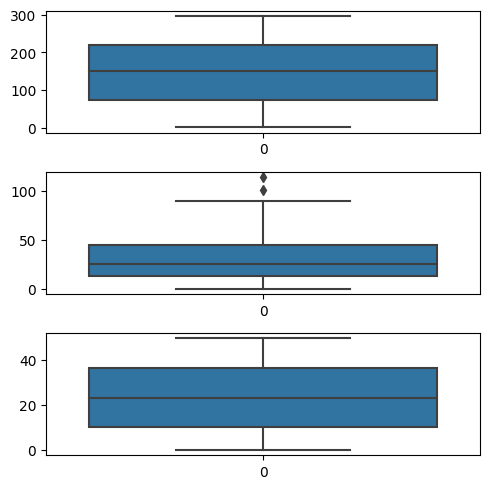

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


#checking for outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

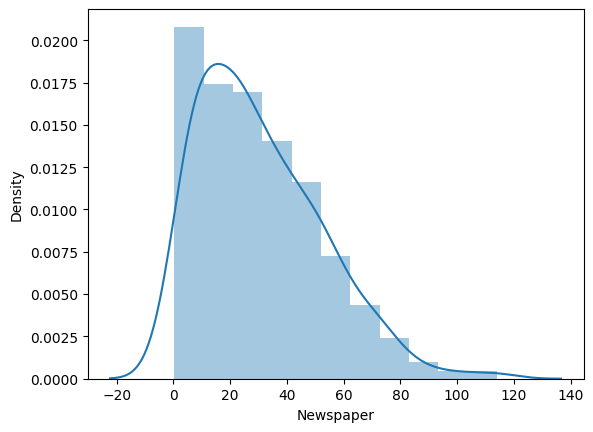

In [15]:
sns.distplot(df['Newspaper'])

In [16]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [17]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr * 1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr * 1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [18]:
data = df.copy()

In [19]:
data.loc[data['Newspaper'] >= 93, 'Newspaper'] = 93

<Axes: >

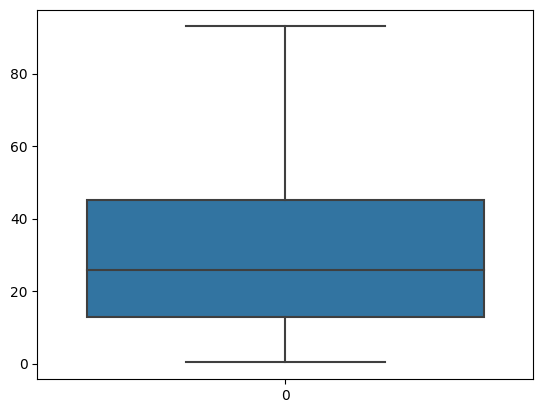

In [20]:
sns.boxplot(data['Newspaper'])

<Axes: >

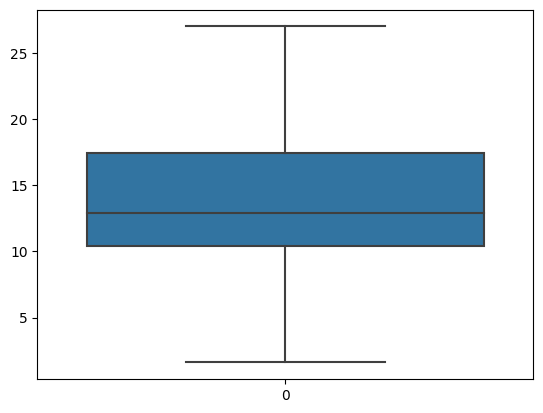

In [21]:
sns.boxplot(data['Sales'])

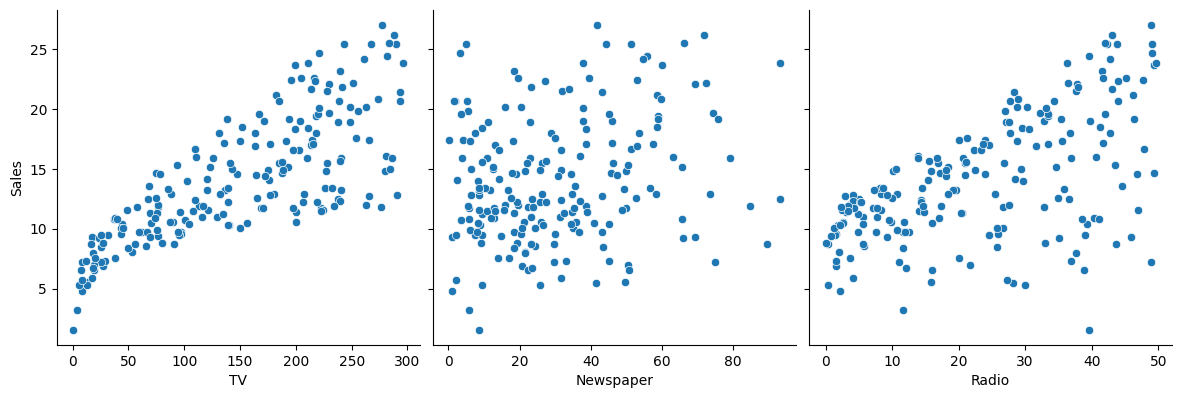

In [22]:
sns.pairplot(data, x_vars = ['TV', 'Newspaper', 'Radio'], y_vars = 'Sales', height = 4, aspect = 1, kind = 'scatter')
plt.show()

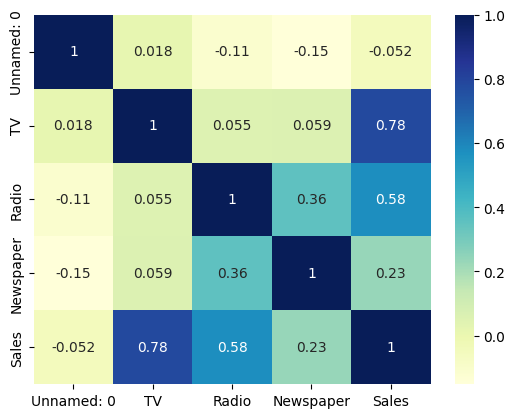

In [23]:
sns.heatmap(data.corr(), cmap = 'YlGnBu',annot = True)
plt.show()

In [28]:
#corelation
important_features = list(df.corr()['Sales'][(df.corr()['Sales'] > +0.5) | (df.corr()['Sales'] < -0.5)].index)

In [29]:
print(important_features)

['TV', 'Radio', 'Sales']


In [32]:
X = data['TV']
Y = data['Sales'] 

In [33]:
X = X.values.reshape(-1,1)

In [34]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [35]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [37]:
X.shape

(200, 1)

In [39]:
Y.shape

(200,)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33)

In [41]:
print(X_train.shape, Y_train.shape)

(134, 1) (134,)


In [44]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
knn = KNeighborsRegressor().fit(X_train, Y_train)
knn

KNeighborsRegressor()

In [46]:
knn_train_pred = knn.predict(X_train)

In [47]:
knn_test_pred = knn.predict(X_test)

In [49]:
knn_train_pred

array([19.4 , 19.04, 13.56, 20.34, 16.84, 21.3 , 13.22, 16.12, 19.98,
       14.02, 15.36, 14.4 , 16.04,  8.4 , 14.08, 14.82, 15.1 , 13.52,
       19.98, 18.14, 15.2 ,  8.96, 17.72, 16.86, 19.98, 18.44, 10.88,
       14.66, 19.7 ,  8.66, 21.92, 11.14, 11.14, 14.44,  5.46, 15.9 ,
        6.42, 16.4 , 14.08, 19.48, 21.06, 10.88, 14.66, 14.02, 13.22,
       21.52, 11.14, 12.1 , 11.88, 16.12, 19.96, 11.14, 20.34, 19.4 ,
       14.66, 16.14, 17.72, 10.88, 19.98, 11.12, 19.  ,  6.68,  9.  ,
       10.2 , 12.1 , 15.2 , 16.4 , 14.44, 15.92, 19.36, 16.64, 10.92,
       19.76, 15.78, 14.82, 10.16, 17.28, 12.1 ,  9.94, 11.52, 19.76,
       21.7 ,  8.18, 11.14, 14.02, 14.02, 11.24,  8.98, 23.48, 11.52,
       21.3 , 20.22, 15.1 ,  7.24, 16.84, 14.02, 11.12,  6.68,  5.46,
       16.14, 21.16, 16.6 , 19.04, 15.1 , 13.8 , 15.1 , 17.3 , 16.12,
        6.68,  8.7 , 21.36, 10.16, 11.52, 15.78, 19.16, 11.12,  9.94,
       15.78,  8.18,  8.2 , 11.88, 18.14, 21.92, 17.72,  8.2 , 14.66,
       13.8 , 16.14,

In [50]:
knn_test_pred

array([14.86,  6.68,  6.68, 17.72, 16.86, 18.44, 14.08, 15.84, 15.2 ,
       15.36, 15.14,  6.68, 13.22, 10.88, 13.8 , 17.18,  5.46, 16.84,
       18.98, 11.52,  7.24, 10.2 , 16.16, 14.34,  8.98, 16.86, 10.88,
       10.16, 20.7 , 17.28,  8.7 , 11.52, 16.14,  9.94,  9.84, 18.14,
        5.46,  5.46,  8.18, 10.16, 13.38, 17.4 , 16.6 , 16.84, 11.14,
       14.94, 18.38, 15.78, 17.28, 13.22, 13.8 ,  5.46, 16.98,  9.94,
       21.36, 14.08, 21.06, 13.42,  6.66, 19.98, 21.92, 11.6 , 15.2 ,
        6.66,  5.46,  5.46])

In [51]:
Results = pd.DataFrame(columns = ['Model','Train R2','Test R2', 'Test RMSE','Varience'])

In [56]:
r2 = r2_score(Y_test,knn_test_pred)
r2_train = r2_score(Y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test, knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance}, ignore_index = True)
print("R2:",r2)
print("RMSE: ",rmse)

R2: 0.5119853870849455
RMSE:  3.282634751094143


In [57]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Varience,Variance
0,K-Nearest Neighbors,0.657767,0.511985,3.282635,NaN,0.145782


In [59]:
svr = SVR().fit(X_train,Y_train)
svr

SVR()

In [60]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [61]:
svr_train_pred

array([17.43732132, 17.6926237 , 12.54080912, 19.75969391, 18.2076162 ,
       19.16742089, 14.03657412, 16.74537822, 19.62397811, 13.31718351,
       17.90167642, 12.96355463, 17.00283711,  8.68745107, 14.1091185 ,
       15.4719186 , 14.60210852, 14.31906034, 19.71645069, 16.20878027,
       18.66166143, 10.02362366, 18.93039604, 17.80240926, 19.69034006,
       17.60905709, 10.97233178, 15.70993923, 16.45332606,  8.77182919,
       19.72107827, 10.55940695, 10.42885715, 14.21049158,  8.45403648,
       16.8781404 ,  8.42900139, 17.09359257, 14.16417443, 17.58818821,
       19.41058843, 10.96657705, 15.70993923, 13.33135546, 13.95471552,
       19.84359778, 10.38370228, 10.8975317 , 10.87452486, 16.74537822,
       19.81448683, 10.51388684, 19.77491136, 17.43213587, 15.62990083,
       15.28774958, 18.86290978, 10.97233178, 19.58805136, 12.0642964 ,
       16.53358508,  8.46684644,  9.70144083, 12.1624601 , 10.92054353,
       18.75191046, 17.098657  , 14.25239476, 15.42664236, 17.29

In [62]:
svr_test_pred

array([17.98509483,  8.46684644,  8.43421817, 16.05188779, 17.79195344,
       17.6560483 , 14.17683026, 15.35292919, 18.66166143, 17.90167642,
       16.95775878,  8.46359061, 13.99359633, 11.0759076 , 12.80822202,
       15.872451  ,  8.42830926, 18.07860858, 16.42988915, 11.59043354,
        8.49775061, 12.14615899, 14.87651758, 13.84127549,  9.44389986,
       17.76581203, 11.19087944,  8.99770885, 19.84463772, 16.63875718,
        9.91064625, 11.65259215, 15.23904614,  9.26826375, 10.17151473,
       16.18163034,  8.43056855,  8.42809726,  8.57215823,  9.00540777,
       13.11580175, 18.40083066, 18.26906337, 18.19220131, 10.54801679,
       13.81485224, 16.33229129, 18.77998913, 16.63875718, 13.17390996,
       12.68585702,  8.4324892 , 18.52041852,  9.27721084, 19.83138789,
       14.16839506, 19.35567764, 13.73946752,  8.48649493, 19.62890697,
       19.70732673, 10.63930783, 18.69989977,  8.48515477,  8.4287802 ,
        8.49437557])

In [63]:
r2 = r2_score(Y_test, svr_test_pred)
r2_train = r2_score(Y_train, svr_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test, svr_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'Support Vector Machine', 'Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index = True)
print("R2:",r2)
print("RMSE: ",rmse)

R2: 0.5308801000938621
RMSE:  3.21845971492581


In [64]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Varience,Variance
0,K-Nearest Neighbors,0.657767,0.511985,3.282635,NaN,0.145782
1,Support Vector Machine,0.600224,0.530880,3.218460,NaN,0.069344


In [67]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_constant).fit()

In [68]:
model.params

const    7.108337
x1       0.049537
dtype: float64

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           6.63e-29
Time:                        14:21:43   Log-Likelihood:                -349.73
No. Observations:                 134   AIC:                             703.5
Df Residuals:                     132   BIC:                             709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1083      0.603     11.788      0.000       5.916       8.301
x1             0.0495      0.003     14.424      0.000       0.043       0.056
==============================================================================
Omnibus:                        1.806   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.757
Skew:                          -0.275   Prob(JB):                        0.415
Kurtosis:                       2.891   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

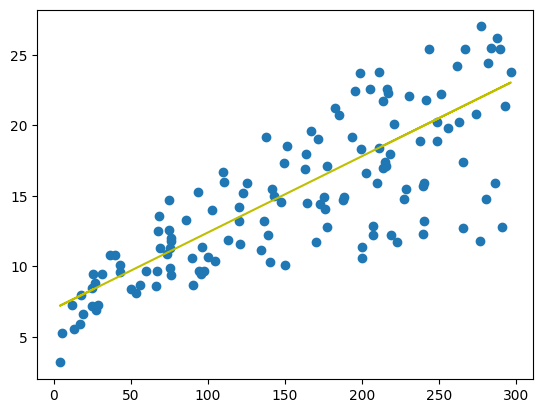

In [76]:
plt.scatter(X_train, Y_train)
plt.plot(X_train,6.9955 + 0.0541* X_train, 'y')
plt.show()

In [78]:
Y_train_pred = model.predict(X_train_constant)
res = (Y_train - Y_train_pred)

In [79]:
res

84     4.015570
20     0.072840
143   -1.889879
35    -8.708665
23    -2.917573
         ...   
51    -1.381825
131   -7.545479
102   -6.188530
171   -0.757130
136    1.123522
Name: Sales, Length: 134, dtype: float64

In [81]:
Y_train_pred

array([17.68442957, 17.92715955, 12.28987944, 21.50866528, 18.4175732 ,
       19.43307621, 13.85524018, 17.00577634, 20.12163678, 13.06265246,
       18.12530648, 12.70103432, 17.26336734,  8.52508781, 13.93945262,
       15.59397947, 14.52893973, 14.18713628, 20.32969106, 16.44105759,
       18.86835746, 10.0607265 , 19.15567051, 18.03118669, 20.26529331,
       17.84790078, 10.8929436 , 15.87633885, 16.70360227,  8.66874433,
       21.61764609, 10.53627913, 10.42234465, 14.05834078,  7.31143787,
       17.13952551,  7.68791704, 17.35253346, 14.00385037, 17.82808609,
       19.76001864, 10.88798993, 15.87633885, 13.07751348, 13.76112039,
       21.04797367, 10.38271526, 10.82854585, 10.80873116, 17.00577634,
       20.66654084, 10.49664974, 21.45912855, 17.67947589, 15.78221905,
       15.37106418, 19.08136541, 10.8929436 , 20.05228536, 11.84900253,
       16.78781472,  7.96036906,  9.75855244, 11.93816865, 10.84836054,
       18.96247725, 17.35748713, 14.10787751, 15.53948907, 17.54

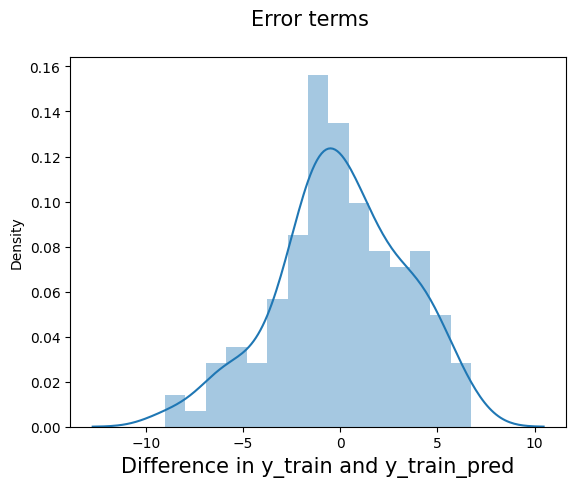

In [82]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize = 15)
plt.show()

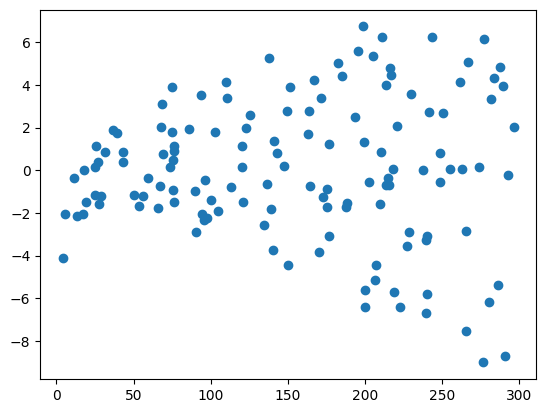

In [83]:
plt.scatter(X_train,res)
plt.show()

In [84]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [85]:
y_pred

array([18.20456525,  7.96036906,  7.75726846, 16.26767903, 18.02127934,
       17.89248384, 14.01871139, 15.45032295, 18.86835746, 18.12530648,
       17.21878428,  7.94550804, 13.80570345, 10.98210972, 12.54747045,
       16.06457843,  7.53435317, 18.29373137, 16.6788339 , 11.42794031,
        8.07925722, 11.92330763, 14.86578951, 13.63232488,  9.50096143,
       17.99651098, 11.08118318,  8.99073309, 21.01329796, 16.89679553,
        9.95669936, 11.48243071, 15.3116201 ,  9.31272185, 10.19447568,
       16.41133555,  7.49472378,  7.53930684,  8.28731149,  9.00064044,
       12.85459819, 18.60581278, 18.47701728, 18.40271218, 10.52637178,
       13.60260284, 16.57480677, 18.99219929, 16.89679553, 12.91404227,
       12.42858229,  7.46995542, 18.72470094,  9.32262919, 21.1916302 ,
       14.00880405, 19.68075987, 13.5183904 ,  8.03962783, 20.13154413,
       21.6523218 , 10.60563055, 18.90798685,  8.03467416,  7.52444582,
        7.14301298])

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
np.sqrt(mean_squared_error(Y_test, y_pred))


3.2215927952230947

In [89]:
r2 = r2_score(Y_test, y_pred)

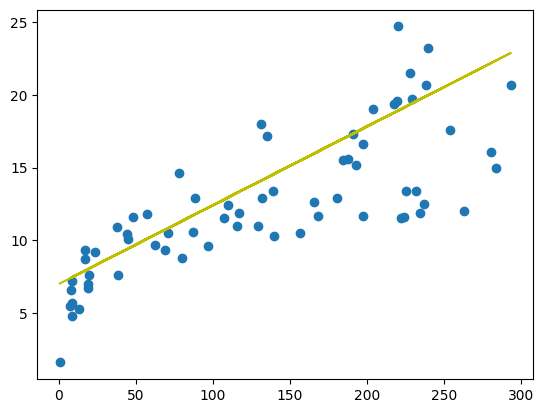

In [90]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()